# Planet STAC Example

Demo of retrieving data from Planet via their STAC proxy api using the PySTAC Client. Requires an api-key saved in as `.planet.json` which has the content `{"key": "API_KEY"}`.

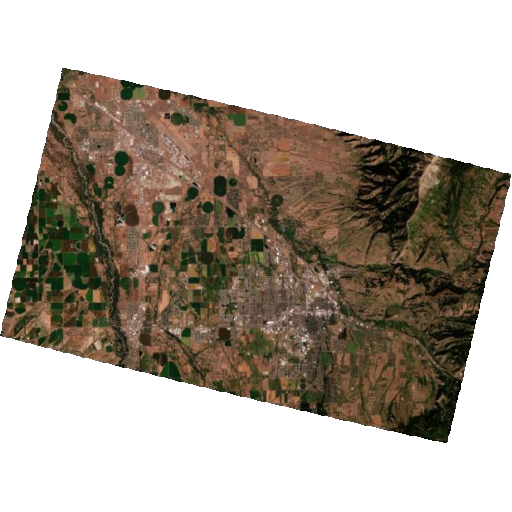

In [3]:
import base64
from pystac_client import Client
import requests
from shapely import Point
import planet
from IPython.display import Image

api_key = planet.Auth.from_file().value

userpass = f"{api_key}:"

headers = {
    "Authorization": f"Basic {base64.b64encode(userpass.encode()).decode()}"
}


client = Client.open(
    url="https://api.planet.com/x/data/",
    headers=headers
)

item_search = client.search(
    collections=['PSScene'],
    datetime='2024-06-01/2024-08-01',
    intersects=Point(-111, 45.68),
    filter={
        "op": ">=",
        "args": [{"property": "clear_percent"}, 50]
    }
)

item = next(item_search.items())
thumbnail = requests.get(item.assets["thumbnail"].href, headers=headers)
Image(data=thumbnail.content)


In [10]:
import pyeodh
import base64
from io import BytesIO
from pystac_client import Client
import requests
from shapely import Point
import planet
from IPython.display import Image

api_key = planet.Auth.from_file().value

userpass = f"{api_key}:"

headers = {
    "Authorization": f"Basic {base64.b64encode(userpass.encode()).decode()}"
}

client = pyeodh.Client(username=api_key).get_catalog_service()
item_search = client.search(
    collections=['PSScene'],
    datetime='2024-06-01/2024-08-01',
    intersects=Point(-111, 45.68),
    filter={
        "op": ">=",
        "args": [{"property": "clear_percent"}, 50]
    }
)

item = item_search[0]
thumbnail = requests.get(item.assets["thumbnail"].href, headers=headers)
Image(data=thumbnail.content)

HTTPError: 400 Client Error: Bad Request for url: https://test.eodatahub.org.uk/api/catalogue/stac/search